In [28]:
import pandas as pd # needed for most operation
import numpy as np # needed for some array operations
from sklearn.model_selection import train_test_split
import pickle
pd.__version__

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

data = pd.read_pickle("../data/IterImputFullBalanced") #revertir a full balanced
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.head()

#2
data2 = pd.read_pickle("../data/IterImput_Test")

#3 FULL set
data3 = pd.read_pickle("../data/IterImput")

#pd.unique(data['Decreased_mobility'])
dec_mob = pd.cut(data['Decreased_mobility'],bins=[-0.1,10,20,30,40,50,60,70],labels=[1,2,3,4,5,6,7]) #numerical from 0 to 70
data['Decreased_mobility'] = dec_mob

#2
dec_mob = pd.cut(data2['Decreased_mobility'],bins=[-0.1,10,20,30,40,50,60,70],labels=[1,2,3,4,5,6,7]) #numerical from 0 to 70
data2['Decreased_mobility'] = dec_mob
data.head(10)

X = data.loc[:, data.columns != 'Treatment']
y = data['Treatment'].astype(int)
X2 = data2.loc[:, data.columns != 'Treatment']
y2 = data2['Treatment'].astype(int)
print(y.value_counts())
print(y.value_counts())
print(X.columns)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


1    300
2    300
3    300
5    300
Name: Treatment, dtype: int64
1    300
2    300
3    300
5    300
Name: Treatment, dtype: int64
Index(['Fever', 'Duration_of_pain', 'Sick_leave', 'Earlier_hospitalization',
       'Familiy_history', 'Depression', 'Extremely_nervous', 'Stress',
       'Irrational_thoughts_risk_lasting', 'Irrational_thoughts_work',
       'Coping_strategy', 'Kinesiophobia_physical_exercise',
       'Kinesiophobia_pain_stop', 'Age', 'Uses_analgesics',
       'Uses_corticosteroids', 'Serious_disease', 'Neurogenic_signals',
       'Continuous_pain', 'Decreased_mobility', 'Nocturnal_pain',
       'Weightloss_per_year', 'Loss_muscle_strength', 'Failure_symptoms',
       'Incoordination', 'neck_pain_intensity', 'low_back_pain_intensity',
       'arm_left_pain_intensity', 'arm_right_pain_intensity',
       'leg_left_pain_intensity', 'leg_right_pain_intensity', 'Paidwork'],
      dtype='object')


In [33]:
base = DecisionTreeClassifier(max_depth=10)
clf = AdaBoostClassifier(base_estimator=base, n_estimators=100, learning_rate=0.1)
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
print(scores.mean())
clf = clf.fit(X, y)
#print(clf.score(X_test,y_test))

y_predict = clf.predict(X2)
print(classification_report(y2,y_predict))



0.6183333333333333
              precision    recall  f1-score   support

           1       0.45      0.46      0.46       128
           2       0.12      0.20      0.15        30
           3       0.00      0.00      0.00         8
           5       0.46      0.39      0.42       141

    accuracy                           0.39       307
   macro avg       0.26      0.26      0.26       307
weighted avg       0.41      0.39      0.40       307



In [42]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
# define the model
base = DecisionTreeClassifier(max_depth=10) 
model = AdaBoostClassifier(base_estimator=base, n_estimators=50, learning_rate=0.6) #n_estimators=50, learning_rate=1.0, algorithm='SAMME.R'
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

clf = model.fit(X, y)
#print(clf.score(X_test,y_test))

y_predict = model.predict(X2)
print(classification_report(y2,y_predict))

fpr, tpr, thresholds = metrics.roc_curve(y2, y_predict, pos_label=2)
metrics.auc(fpr, tpr)

metrics.roc_auc_score(y2, clf.predict_proba(X2), multi_class='ovr')

Accuracy: 0.641 (0.039)
              precision    recall  f1-score   support

           1       0.45      0.45      0.45       128
           2       0.22      0.23      0.23        30
           3       0.17      0.12      0.14         8
           5       0.55      0.55      0.55       141

    accuracy                           0.47       307
   macro avg       0.35      0.34      0.34       307
weighted avg       0.47      0.47      0.47       307



0.6097596114311984

>1 0.390 (0.026)
>2 0.400 (0.039)
>3 0.424 (0.038)
>4 0.437 (0.038)
>5 0.442 (0.033)
>6 0.444 (0.040)
>7 0.449 (0.035)
>8 0.464 (0.036)
>9 0.455 (0.036)
>10 0.460 (0.028)
>11 0.461 (0.035)
>12 0.460 (0.033)
>13 0.466 (0.030)
>14 0.465 (0.033)
>15 0.464 (0.034)
>16 0.449 (0.032)
>17 0.448 (0.039)
>18 0.412 (0.040)
>19 0.409 (0.038)


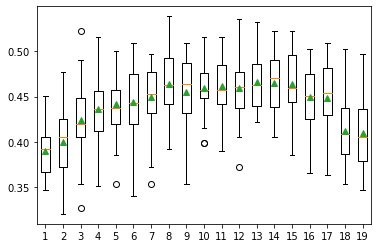

In [21]:
# explore adaboost ensemble tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
        X = data.loc[:, data.columns != 'Treatment']
        y = data['Treatment'].astype(int)
        return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore depths from 1 to 10
	for i in range(1,20):
		# define base model
		base = DecisionTreeClassifier(max_depth=i)
		# define ensemble model
		models[str(i)] = AdaBoostClassifier(base_estimator=base, n_estimators=100)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [24]:
# example of grid searching key hyperparameters for adaboost on a classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
# define dataset
# define the model with default hyperparameters
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [5, 7, 10,15, 20,30,50,100,500]
grid['learning_rate'] = [0.0005, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.469683 using {'learning_rate': 0.5, 'n_estimators': 50}
0.454878 (0.032411) with: {'learning_rate': 0.0005, 'n_estimators': 5}
0.454878 (0.032411) with: {'learning_rate': 0.0005, 'n_estimators': 7}
0.454878 (0.032411) with: {'learning_rate': 0.0005, 'n_estimators': 10}
0.454878 (0.032411) with: {'learning_rate': 0.0005, 'n_estimators': 15}
0.454878 (0.032411) with: {'learning_rate': 0.0005, 'n_estimators': 20}
0.457471 (0.031410) with: {'learning_rate': 0.0005, 'n_estimators': 30}
0.459868 (0.031571) with: {'learning_rate': 0.0005, 'n_estimators': 50}
0.460085 (0.031532) with: {'learning_rate': 0.0005, 'n_estimators': 100}
0.450550 (0.027684) with: {'learning_rate': 0.0005, 'n_estimators': 500}
0.454878 (0.032411) with: {'learning_rate': 0.0001, 'n_estimators': 5}
0.454878 (0.032411) with: {'learning_rate': 0.0001, 'n_estimators': 7}
0.454878 (0.032411) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.454878 (0.032411) with: {'learning_rate': 0.0001, 'n_estimators': 15}
0.